# Task 1: Introduction

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [5]:
def generate_examples(num=1000):
    W= [1.0, -3.0]
    b=1.0
  
    W= np.reshape(W,(2, 1))
    X= np.random.randn(num, 2)
    y=b + np.dot(X, W) + np.random.randn()
    y=np.reshape(y,(num,1))
    
    return X,y

In [6]:
X,y=generate_examples(1000)

In [7]:
print(X.shape,y.shape)

(1000, 2) (1000, 1)


In [8]:
print(X[0],y[0])

[0.66313873 0.33940006] [-1.95162017]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [9]:
class model:
    #default constructor
    def __init__(self,num_features):
        self.num_features=num_features
        self.W=np.random.randn(num_features,1) #it will generate coeffecients w for number of features eg: 2 here
        self.b=np.random.randn()
        

In [10]:
m= model(2)
print(m.W)
print(m.b)

[[0.83277152]
 [1.75146251]]
1.1560781500786095


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [16]:
class model(model):
    def forward_pass(self,X):
        y_hat= self.b+ np.dot(X,self.W)
        return y_hat
        

In [18]:
y_hat= model(2).forward_pass(X)
print(y_hat.shape,y_hat[0])

(1000, 1) [1.88591889]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [19]:
class model(model):
    def compute_loss(self,y_hat,y_true):
        loss=np.sum(np.square(y_hat-y_true))/(2*y_hat.shape[0])
        return loss

In [20]:
loss=model(2).compute_loss(y_hat,y)


In [21]:
loss

10.811041443745125

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [85]:
class model(model):
    def backward_pass(self,X,y_true,y_hat):
        m=y_true.shape[0]
        db=(1/m)*np.sum(y_hat-y_true)
        dw=(1/m)*np.sum(np.dot(np.transpose(y_hat-y_true),X),axis=0)
        return db,dw

In [86]:
m=model(2)
X,y = generate_examples()
y_hat=m.forward_pass(X)
db,dw=m.backward_pass(X,y,y_hat)

In [88]:
db

array([-2.0581125 ,  2.93040843])

# Task 7: Update Parameters

In [100]:
class model(model):
    def update_params(self,dW, db, lr):
        self.W=self.W-lr*np.reshape(dW,(self.num_features,1))
        self.b=self.b-db

# Task 8: Training Loop

In [113]:
class model(model):
    def train(self,x_train,y_train,iterations,lr):
        losses =[]
        for i in range(0,iterations):
            y_hat=self.forward_pass(x_train)
            loss=self.compute_loss(y_hat,y_train)
            db,dW=self.backward_pass(x_train,y_train,y_hat)
            self.update_params(dW,db,lr)
            losses.append(loss)
            if i%int(iterations/10)==0:
                print('Iter:{},loss:{:.4f}'.format(i,loss))
        return losses

In [137]:
m=model(2)

In [138]:
x_train,y_train=generate_examples()

In [141]:
losses=m.train(x_train,y_train,1000,3e-3)

Iter:0,loss:0.0582
Iter:100,loss:0.0321
Iter:200,loss:0.0177
Iter:300,loss:0.0098
Iter:400,loss:0.0054
Iter:500,loss:0.0030
Iter:600,loss:0.0016
Iter:700,loss:0.0009
Iter:800,loss:0.0005
Iter:900,loss:0.0003


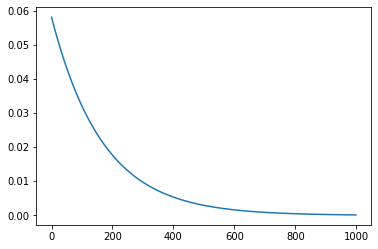

In [142]:
plt.plot(losses)

# Task 9: Predictions

In [143]:
model_untrained=model(2)
x_test,y_test=generate_examples(500)

In [150]:
pred_untrained=model_untrained.forward_pass(x_test)
pred_trained=m.forward_pass(x_test)

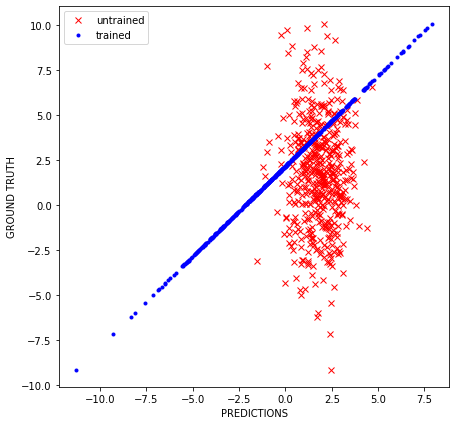

In [158]:
plt.figure(figsize=(7,7))
plt.plot(pred_untrained,y_test,'rx',label='untrained') #rx means colour is red and symbol is X
plt.plot(pred_trained,y_test,'b.',label='trained')
plt.legend() # to show labels of trained and untrained
plt.xlabel('PREDICTIONS')
plt.ylabel('GROUND TRUTH')
plt.show()